# A Monte Carlo vs Quasi-Monte Carlo Comparison

Monte Carlo algorithms work on independent identically distributed (iid) points while Quasi-Monte Carlo algorithms work on low discrepancy sequences (lds). lds generators, such as those for the lattice and Sobol sequences, provide samples whose space filling properties can be exploited by Quasi-Monte Carlo algorithms.

The number of points for Monte Carlo algorithms is $\mathcal{O}(1/\epsilon^2)$ while Quasi-Monte Carlo algorithms can be as efficient as $\mathcal{O}(1/\epsilon)$

Data for the following plots can be generated by running
~~~
python workouts/wo_comparison_test.py
~~~

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2e}'.format

import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt

In [2]:
distrib_names = ['IIDStdUniform','IIDStdGaussian','Lattice','Sobol']

# Absolute Tolerance Plots

<b>Testing Parameters</b><br>
- relative tolerance = 0
- lds initial sample size = 16
- iid initial sample size = 256

Keister Integrand
- $y_i = \pi^{d/2} * \cos(||x_i||_2)$
- $d=3$

Gaussian True Measure
- $\mathcal{N}_3(0,\frac{1}{2})$
<br>

In [3]:
df_abstols = pd.read_csv('../outputs/comparison_tests/abs_tol.csv')
df_abstols.loc[::50]

,abs_tol,IIDStdUniform_solution,IIDStdGaussian_solution,Lattice_solution,Sobol_solution,IIDStdUniform_time,IIDStdGaussian_time,Lattice_time,Sobol_time,IIDStdUniform_n,IIDStdGaussian_n,Lattice_n,Sobol_n
0,1.20e-03,2.17e+00,2.17e+00,2.17e+00,2.17e+00,1.01e+01,2.82e+00,3.98e-02,4.44e-02,2.85e+07,2.96e+07,2.05e+03,2.05e+03
50,1.12e-02,2.18e+00,2.17e+00,2.17e+00,2.17e+00,1.27e-01,3.66e-02,8.56e-03,1.21e-02,3.27e+05,3.40e+05,2.56e+02,2.56e+02
100,2.12e-02,2.19e+00,2.17e+00,2.17e+00,2.17e+00,3.53e-02,9.61e-03,8.30e-03,9.58e-03,9.17e+04,9.53e+04,2.56e+02,1.28e+02
150,3.12e-02,2.19e+00,2.17e+00,2.17e+00,2.17e+00,1.68e-02,5.15e-03,4.12e-03,8.62e-03,4.26e+04,4.43e+04,6.40e+01,6.40e+01
200,4.12e-02,2.18e+00,2.16e+00,2.17e+00,2.17e+00,1.04e-02,3.43e-03,4.09e-03,8.26e-03,2.47e+04,2.56e+04,6.40e+01,6.40e+01
250,5.12e-02,2.17e+00,2.18e+00,2.17e+00,2.15e+00,7.40e-03,2.60e-03,4.14e-03,7.33e-03,1.61e+04,1.68e+04,6.40e+01,3.20e+01
300,6.12e-02,2.16e+00,2.18e+00,2.17e+00,2.15e+00,5.84e-03,2.17e-03,4.09e-03,7.39e-03,1.15e+04,1.19e+04,6.40e+01,3.20e+01
350,7.12e-02,2.16e+00,2.20e+00,2.16e+00,2.15e+00,4.57e-03,1.82e-03,2.68e-03,7.44e-03,8.60e+03,8.91e+03,3.20e+01,3.20e+01
400,8.12e-02,2.17e+00,2.20e+00,2.16e+00,2.15e+00,3.80e-03,1.59e-03,2.61e-03,7.02e-03,6.73e+03,6.97e+03,3.20e+01,3.20e+01
450,9.12e-02,2.17e+00,2.19e+00,2.16e+00,2.15e+00,3.35e-03,1.54e-03,2.68e-03,7.52e-03,5.44e+03,5.63e+03,3.20e+01,3.20e+01


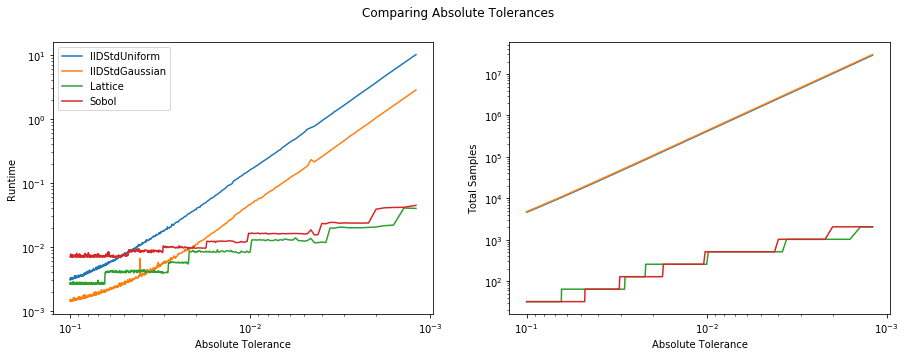

In [4]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
abstols = df_abstols['abs_tol'].values
for distrib_name in distrib_names:
    times = df_abstols[distrib_name+'_time'].values
    n_total = df_abstols[distrib_name+'_n'].values
    ax[0].loglog(abstols, times, label=distrib_name)
    ax[1].loglog(abstols, n_total, label=distrib_name)
ax[0].legend(loc='upper left')
ax[0].set_xlim(ax[0].get_xlim()[::-1])
ax[1].set_xlim(ax[1].get_xlim()[::-1])
ax[0].set_xlabel('Absolute Tolerance')
ax[0].set_ylabel('Runtime')
ax[1].set_xlabel('Absolute Tolerance')
ax[1].set_ylabel('Total Samples')
fig.suptitle('Comparing Absolute Tolerances')
plt.savefig('../outputs/comparison_tests/abstols_plot.png',dpi=200)

# Dimension Plots
<b>Testing Parameters</b><br>
- absolute tolerance = 0
- lds initial sample size = 16
- iid initial sample size = 256

Keister Integrand
- $y_i = \pi^{d/2} * \cos(||x_i||_2)$

Gaussian True Measure
- $\mathcal{N}_d(0,\frac{1}{2})$
<br>

In [5]:
df_dimensions = pd.read_csv('../outputs/comparison_tests/dimension.csv')
df_dimensions.dimension = df_dimensions.dimension.astype(int)
df_dimensions.loc[::4]

,dimension,IIDStdUniform_solution,IIDStdGaussian_solution,Lattice_solution,Sobol_solution,IIDStdUniform_time,IIDStdGaussian_time,Lattice_time,Sobol_time,IIDStdUniform_n,IIDStdGaussian_n,Lattice_n,Sobol_n
0,1,1.38e+00,1.38e+00,1.38e+00,1.38e+00,3.24e-03,1.43e-03,3.50e-03,8.20e-03,1.20e+04,9.99e+03,6.40e+01,6.40e+01
4,5,1.13e+00,1.13e+00,1.14e+00,1.14e+00,2.84e+00,1.76e-01,2.74e-02,3.02e-02,4.66e+06,1.25e+06,1.02e+03,1.02e+03
8,9,-7.11e+01,-7.15e+01,-7.17e+01,-7.16e+01,9.32e-02,1.91e-02,2.12e-02,4.09e-02,8.54e+04,8.95e+04,5.12e+02,1.02e+03
12,13,-1.20e+03,-1.20e+03,-1.20e+03,-1.20e+03,2.11e-02,5.53e-03,2.70e-02,3.05e-02,1.36e+04,1.75e+04,5.12e+02,5.12e+02
16,17,-1.43e+04,-1.43e+04,-1.43e+04,-1.43e+04,1.08e-02,2.61e-03,3.31e-02,3.62e-02,5.28e+03,5.45e+03,5.12e+02,5.12e+02
20,21,-1.47e+05,-1.47e+05,-1.46e+05,-1.46e+05,9.29e-03,2.08e-03,2.04e-02,4.16e-02,3.64e+03,2.83e+03,2.56e+02,5.12e+02
24,25,-1.36e+06,-1.36e+06,-1.36e+06,-1.35e+06,2.06e-02,3.70e-03,4.38e-02,2.77e-02,7.11e+03,6.30e+03,5.12e+02,2.56e+02
28,29,-1.16e+07,-1.16e+07,-1.15e+07,-1.15e+07,5.26e-02,8.01e-03,4.98e-02,3.04e-02,1.63e+04,1.34e+04,5.12e+02,2.56e+02
32,33,-8.96e+07,-8.90e+07,-8.88e+07,-8.91e+07,1.37e-01,1.84e-02,2.86e-02,5.74e-02,3.58e+04,2.61e+04,2.56e+02,5.12e+02
36,37,-5.97e+08,-5.96e+08,-5.96e+08,-5.93e+08,4.35e-01,5.98e-02,6.09e-02,3.56e-02,1.07e+05,7.84e+04,5.12e+02,2.56e+02


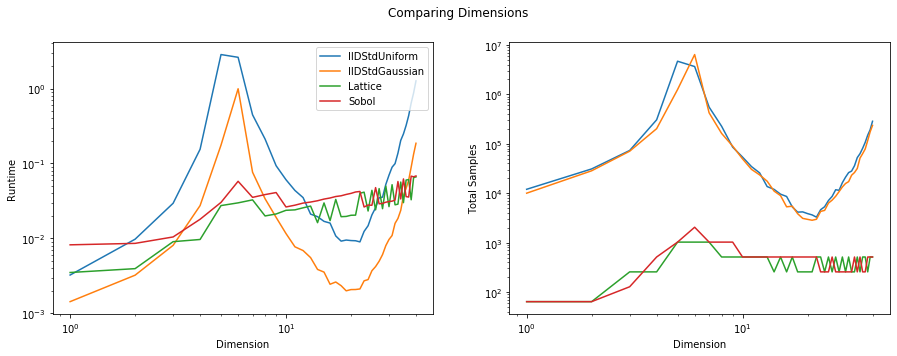

In [7]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dimensions = df_dimensions['dimension']
for distrib_name in distrib_names:
    times = df_dimensions[distrib_name+'_time'].values
    n_total = df_dimensions[distrib_name+'_n'].values
    ax[0].loglog(dimensions, times, label=distrib_name)
    ax[1].loglog(dimensions, n_total, label=distrib_name)
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Dimension')
ax[0].set_ylabel('Runtime')
ax[1].set_xlabel('Dimension')
ax[1].set_ylabel('Total Samples')
fig.suptitle('Comparing Dimensions')
plt.savefig('../outputs/comparison_tests/dimension_plot.png',dpi=200)